# SalishSeaCast as a whole plot
based on Ben's code from https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

Text(0.17, 0.7, 'Strait')

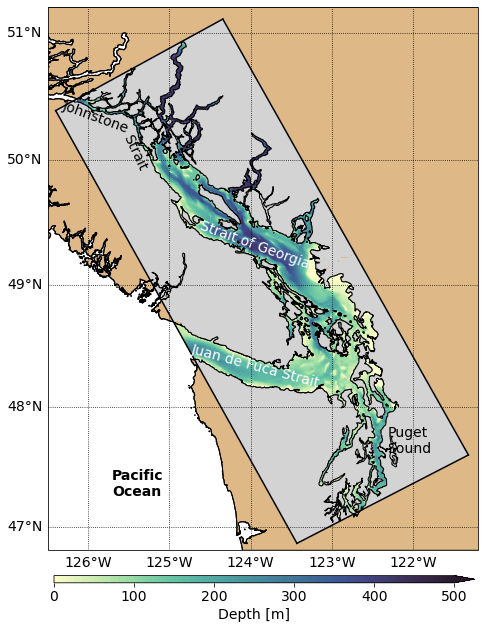

In [3]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset("/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc", mask_and_scale=False)

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Depth
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, grid.Bathymetry, levels=np.arange(0, 500.1, 5),
    cmap=cm.deep, extend='max', transform=crs.PlateCarree(), zorder=1,
)
cax = fig.add_axes([0.15, 0.08, 0.73, 0.01])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]', ticks=[0,100,200,300,400,500])

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='burlywood', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Draw box
# x, y = grid['nav_lon'].values, grid['nav_lat'].values
ax.plot(grid['nav_lon'][ :,  0], grid['nav_lat'][ :,  0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][ :, -1], grid['nav_lat'][ :, -1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][ 0,  :], grid['nav_lat'][ 0,  :], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][-1,  :], grid['nav_lat'][-1,  :], 'k-', zorder=6, transform=crs.PlateCarree())
ax.contourf(grid['nav_lon'],  grid['nav_lat'], grid['Bathymetry'], [-0.01, 0.01], colors='lightgray', zorder=3, transform=crs.PlateCarree())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# # Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', weight= "bold",c='k', transform=ax.transAxes, zorder=7)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes, zorder=7)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', c='w',transform=ax.transAxes, rotation=-15,zorder = 7)
ax.text(0.35, 0.52, 'Strait of Georgia', c='w',transform=ax.transAxes, rotation=-20, zorder=7)
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20, zorder=7)
ax.text(0.17, 0.70, 'Strait',transform=ax.transAxes, rotation=-65, zorder=7)

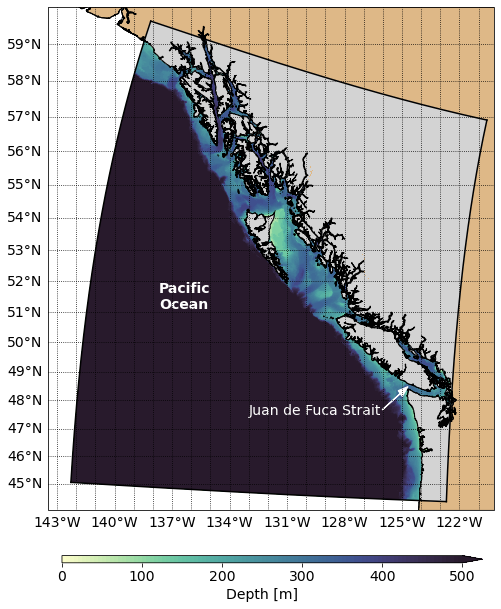

In [4]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset("/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc", mask_and_scale=False)

# Make plot area
xlim, ylim = [-143.5, -120.2], [44, 60]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Depth
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, grid.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.deep, extend='max', transform=crs.PlateCarree(), zorder=1,
)
cax = fig.add_axes([0.15, 0.08, 0.73, 0.01])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]', ticks=[0,100,200,300,400,500])

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='burlywood', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Draw box
# x, y = grid['nav_lon'].values, grid['nav_lat'].values
ax.plot(grid['nav_lon'][ :,  0], grid['nav_lat'][ :,  0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][ :, -1], grid['nav_lat'][ :, -1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][ 0,  :], grid['nav_lat'][ 0,  :], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][-1,  :], grid['nav_lat'][-1,  :], 'k-', zorder=6, transform=crs.PlateCarree())
ax.contourf(grid['nav_lon'],  grid['nav_lat'], grid.mbathy[0,:,:], [-0.01, 0.01], colors='lightgray', zorder=3, transform=crs.PlateCarree())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# # Add annotations
ax.text(0.25, 0.4, 'Pacific\nOcean', weight= "bold",c='w', transform=ax.transAxes, zorder=7)
ax.text(0.45, 0.19, 'Juan de Fuca Strait', c='w',transform=ax.transAxes, zorder = 7)
ax.arrow(0.75,0.2,0.04,0.032, head_width=0.015, edgecolor='w', facecolor='w', transform=ax.transAxes, zorder=7)

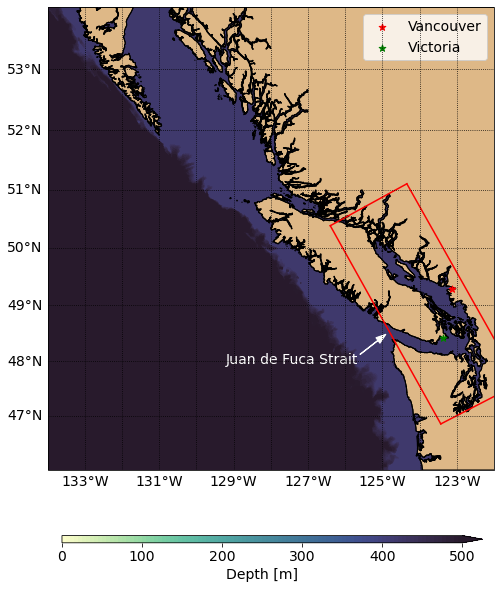

In [5]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset("/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc", mask_and_scale=False)
gridssc = xr.open_dataset("/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc", mask_and_scale=False)

# Make plot area
# xlim, ylim = [-143.5, -120.2], [44, 60]
xlim, ylim = [-134, -122], [46, 54]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Depth
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, grid.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.deep, extend='max', transform=crs.PlateCarree(), zorder=1,
)
cax = fig.add_axes([0.15, 0.08, 0.73, 0.01])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]', ticks=[0,100,200,300,400,500])

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='burlywood', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Draw box
ax.plot(gridssc['nav_lon'][ :,  0], gridssc['nav_lat'][ :,  0], 'r-', zorder=7, transform=crs.PlateCarree())
ax.plot(gridssc['nav_lon'][ :, -1], gridssc['nav_lat'][ :, -1], 'r-', zorder=7, transform=crs.PlateCarree())
ax.plot(gridssc['nav_lon'][ 0,  :], gridssc['nav_lat'][ 0,  :], 'r-', zorder=7, transform=crs.PlateCarree())
ax.plot(gridssc['nav_lon'][-1,  :], gridssc['nav_lat'][-1,  :], 'r-', zorder=7, transform=crs.PlateCarree())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# # Add annotations
# ax.text(0.25, 0.4, 'Pacific\nOcean', weight= "bold",c='w', transform=ax.transAxes, zorder=8)
ax.text(0.4, 0.23, 'Juan de Fuca Strait', c='w',transform=ax.transAxes, zorder = 8)
ax.arrow(0.7,0.25,0.04,0.03, head_width=0.015, edgecolor='w', facecolor='w', transform=ax.transAxes, zorder=8)
ax.scatter(-123.1207,49.2827,marker='*', s=50, c='r', label='Vancouver',transform=crs.PlateCarree(),zorder=8)
ax.scatter(-123.3656,48.4284,marker='*', s=50, c='g', label='Victoria',transform=crs.PlateCarree(),zorder=8)
ax.legend()

In [6]:
def plot_thalweg(ax, T_lon, T_lat):
    lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
    lines = lines.astype(int)

    thalweg_lon = T_lon[lines[:,0],lines[:,1]]
    thalweg_lat = T_lat[lines[:,0],lines[:,1]]
    ax.plot(thalweg_lon, thalweg_lat, 'r', linewidth=2, transform=crs.PlateCarree())

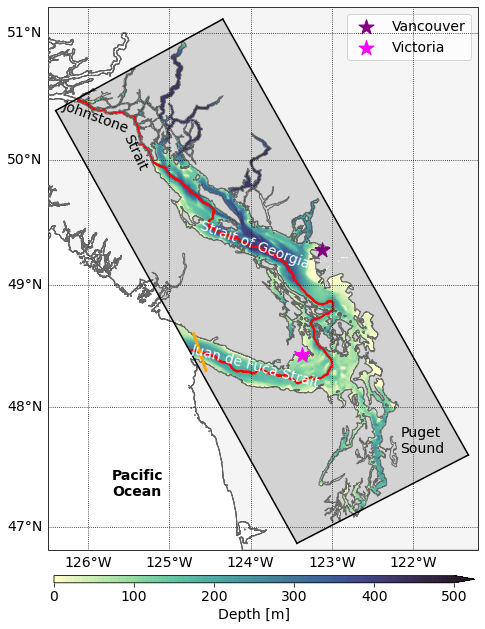

In [7]:
#for CMOS
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset("/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc", mask_and_scale=False)
coords = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
x, y = coords.nav_lon.values, coords.nav_lat.values

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Depth
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, grid.Bathymetry, levels=np.arange(0, 500.1, 5),
    cmap=cm.deep, extend='max', transform=crs.PlateCarree(), zorder=1,
)
cax = fig.add_axes([0.15, 0.08, 0.73, 0.01])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]', ticks=[0,100,200,300,400,500])

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='whitesmoke', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='dimgray', zorder=4))

# Draw box
# x, y = grid['nav_lon'].values, grid['nav_lat'].values
ax.plot(grid['nav_lon'][ :,  0], grid['nav_lat'][ :,  0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][ :, -1], grid['nav_lat'][ :, -1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][ 0,  :], grid['nav_lat'][ 0,  :], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][-1,  :], grid['nav_lat'][-1,  :], 'k-', zorder=6, transform=crs.PlateCarree())
ax.contourf(grid['nav_lon'],  grid['nav_lat'], grid['Bathymetry'], [-0.01, 0.01], colors='lightgray', zorder=3, transform=crs.PlateCarree())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# # Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', weight= "bold",c='k', transform=ax.transAxes, zorder=7)
ax.text(0.82, 0.18, 'Puget\nSound', transform=ax.transAxes, zorder=7)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', c='w',transform=ax.transAxes, rotation=-15,zorder = 8)
ax.text(0.35, 0.52, 'Strait of Georgia', c='w',transform=ax.transAxes, rotation=-20, zorder=7)
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20, zorder=7)
ax.text(0.17, 0.70, 'Strait',transform=ax.transAxes, rotation=-65, zorder=7)
ax.scatter(-123.1207,49.2827,marker='*', s=250, c='purple', label='Vancouver', transform=crs.PlateCarree(),zorder=8)
ax.scatter(-123.3656,48.4284,marker='*', s=250, c='magenta',label='Victoria', transform=crs.PlateCarree(),zorder=8)
ax.legend()
ax.plot([-124.55,-124.7], [48.3,48.6], c='orange', linewidth=3, transform=crs.PlateCarree(),zorder=7)
plot_thalweg(ax, x, y)
# ax.text()

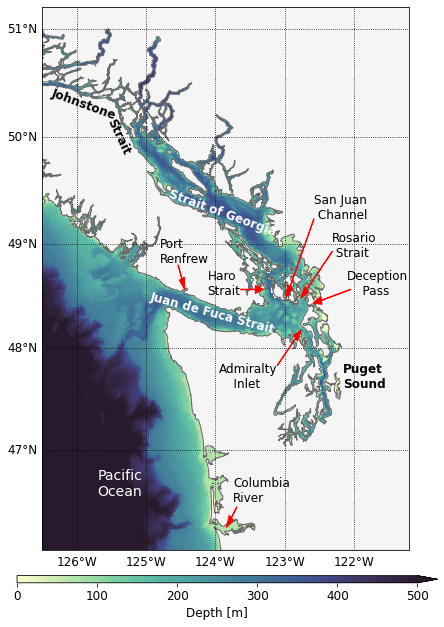

In [8]:
# Increase font size
plt.rcParams['font.size'] = 12

# Load grid and mask files
grid = xr.open_dataset("/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc", mask_and_scale=False)


# Load grid and mask files of SalishSeaCast
grid2 = xr.open_dataset("/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc", mask_and_scale=False)
coords = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
x, y = coords.nav_lon.values, coords.nav_lat.values


# Make plot area
xlim, ylim = [-126.5, -121.2], [46, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Depth SalishSeaCast
c = ax.pcolormesh(
    grid2.nav_lon, grid2.nav_lat, grid2.Bathymetry*1.5, vmin = 0, vmax = 500,
    cmap=cm.deep, transform=crs.PlateCarree(), zorder=1,
)

#Depth CIOPS
c = ax.pcolormesh(
    grid.nav_lon[:,:711], grid.nav_lat[:,:711], grid.mbathy[0,:,:711]*10, vmin = 0, vmax = 500,
    cmap=cm.deep, transform=crs.PlateCarree(),
)
cax = fig.add_axes([0.15, 0.08, 0.73, 0.01])
fig.colorbar(c, cax=cax, extend='max', orientation='horizontal', label='Depth [m]', ticks=[0,100,200,300,400,500])

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='dimgray', facecolor='whitesmoke'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# # Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean',c='w', transform=ax.transAxes, fontsize=14)
ax.text(0.82, 0.30, 'Puget\nSound', weight= "bold", transform=ax.transAxes)
ax.text(0.29, 0.40, 'Juan de Fuca Strait', weight= "bold", c='w',transform=ax.transAxes, rotation=-15,zorder = 11)
ax.text(0.34, 0.58, 'Strait of Georgia', weight= "bold", c='w',transform=ax.transAxes, rotation=-20)
ax.text(0.02, 0.795, 'Johnstone', weight= "bold", transform=ax.transAxes, rotation=-20)
ax.text(0.17, 0.73, 'Strait', weight= "bold",transform=ax.transAxes, rotation=-65)
ax.text(0.45, 0.47, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.32, 0.53, 'Port\nRenfrew', transform=ax.transAxes)
ax.text(0.48, 0.30, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.79, 0.54, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.47, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.74, 0.61, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.52, 0.09, 'Columbia\nRiver', transform=ax.transAxes)
ax.arrow(0.74, 0.61, -0.065, -0.125, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.79, 0.55, -0.07, -0.07, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.84, 0.48, -0.08, -0.02, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.64, 0.34, 0.05, 0.05, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.54, 0.48, 0.04, 0.0, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.53, 0.08, -0.015, -0.02, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.37, 0.525, 0.01, -0.025, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)

# plt.tight_layout()
plt.savefig("./figures/SSmap.png")